In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

%matplotlib inline

### Testing K-mean on simple example

In [98]:
data = pd.DataFrame({
    'X': [2, 2, 8, 5, 7, 6, 1, 4],
    'y': [10, 5, 4, 8, 5, 4, 2, 9]
})

k = 3
centroids=np.zeros([k,data.shape[1]])
for i in range(k):
    centroids[i] = np.random.randint(0,9),np.random.randint(0,9)
print(centroids)

[[7. 3.]
 [8. 7.]
 [1. 7.]]


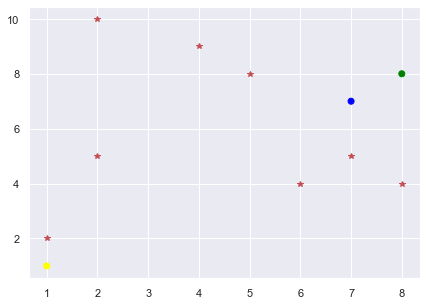

In [99]:
center_x ,center_y = centroids.T 
plt.figure(figsize=(7,5))
plt.plot(data.X,data.y,'r*');
plt.scatter(center_x,center_x,color=['blue','green','yellow']);
plt.show()

In [100]:
data_x, data_y = data.X , data.y
for i in range(50):
    center_x , center_y = centroids.T

    distance_matrix = np.zeros([data_x.shape[0] , center_x.shape[0]])

    for i in range(distance_matrix.shape[0]):
        for j in range(center_x.shape[0]):
            distance_matrix[i,j] = abs(data_x[i]-center_x[j])+abs(data_y[i]-center_y[j])

    groups = np.argmin(distance_matrix,axis=1)
    data["group"]=groups

    for m in range(center_x.shape[0]):
        centroids[m][0] = np.mean(data[data['group'] == m]['X'])
        centroids[m][1] = np.mean(data[data['group'] == m]['y'])

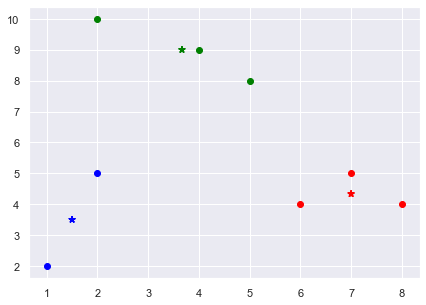

In [101]:
plt.figure(figsize=(7,5))
zz , yy = centroids.T
my_colors = {0:'red',1:'green',2:'blue'}
for i in range(data_x.shape[0]):
    plt.scatter(data_x[i] , data_y[i], color = my_colors.get(data.group[i], 'black'))
    plt.scatter(zz,yy,color=['red','green','blue'],marker="*");
plt.show()

### Assignment Implementation

K-mean implementation

In [218]:
def kmean(data, k):
    
    #random centers
    centroids = np.random.randint(0,256,(k,img.shape[1]))
    
    #data points
    data_x, data_y, data_z = df.R , df.G, df.B
    epoch = 0
    while(True):
        
        closest_groups = df['group'].copy(deep=True)
        center_x ,center_y, center_z = centroids.T

        distance_matrix = np.zeros([data_x.shape[0] , center_x.shape[0]])

        for i in range(distance_matrix.shape[0]):
            for j in range(center_x.shape[0]):
                distance_matrix[i,j] = abs(data_x[i]-center_x[j])+abs(data_y[i]-center_y[j])+abs(data_z[i]-center_z[j])

        groups = np.argmin(distance_matrix,axis=1)
        df["group"]=groups
        
        if closest_groups.equals(df['group']):
            break

        for m in range(center_x.shape[0]):
            if ~(np.isnan(np.mean(df[df['group'] == m]['R']))):
                centroids[m][0] = np.mean(df[df['group'] == m]['R'])
            if ~(np.isnan(np.mean(df[df['group'] == m]['G']))):
                centroids[m][1] = np.mean(df[df['group'] == m]['G'])
            if ~(np.isnan(np.mean(df[df['group'] == m]['B']))):
                centroids[m][2] = np.mean(df[df['group'] == m]['B'])
        
        epoch+=1
        print("Epoch : ",epoch)
    print(centroids)
    return centroids

Loading Image

In [242]:
import cv2
original_img = cv2.imread("image.jpg")
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

Size:  (136, 205, 3)


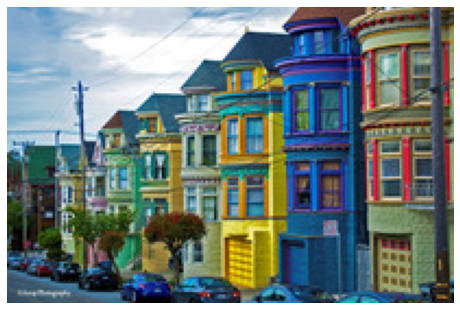

In [243]:
rows , col , channel = original_img.shape
print("Size: ",original_img.shape)
plt.figure(figsize = (8,8))
plt.axis("off")
plt.imshow(original_img)
plt.show()

Converting image to 2d array for k-mean

In [183]:
img = original_img.reshape(-1,3)
img = img.astype('float')
print("shape:", img.shape)

shape: (27880, 3)


converting to dataframe

In [184]:
df = pd.DataFrame(img, columns = ['R','G','B'])
df['group']=0
df

R      G      B  group
0      124.0  166.0  208.0      0
1      123.0  165.0  205.0      0
2      124.0  163.0  202.0      0
3      122.0  166.0  203.0      0
4      115.0  164.0  205.0      0
...      ...    ...    ...    ...
27875   36.0   35.0   33.0      0
27876   38.0   25.0   19.0      0
27877   50.0   38.0   26.0      0
27878   33.0   36.0   25.0      0
27879   22.0   38.0   35.0      0

[27880 rows x 4 columns]

## k=2

In [185]:
centroids = kmean(df,2)

Epoch :  1
Epoch :  2
Epoch :  3
Epoch :  4
Epoch :  5
Epoch :  6
Epoch :  7
Epoch :  8
Epoch :  9
[[ 67  82  84]
 [179 194 186]]


creating image from centroids color

In [186]:
regenerated_image_k2 = centroids[df.group]

In [187]:
regenerated_image_k2

array([[179, 194, 186],
       [179, 194, 186],
       [179, 194, 186],
       ...,
       [ 67,  82,  84],
       [ 67,  82,  84],
       [ 67,  82,  84]])

Displaying image

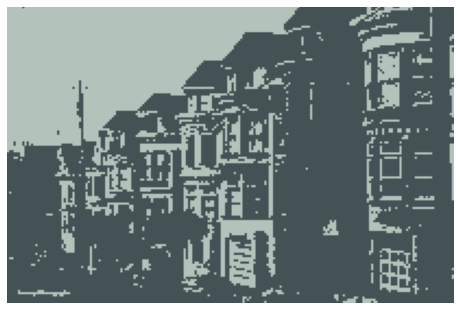

In [188]:
regenerated_image_k2 = regenerated_image_k2.reshape(original_img.shape)
plt.figure(figsize = (8,8))
plt.axis("off")
plt.imshow(regenerated_image_k2)
plt.show()

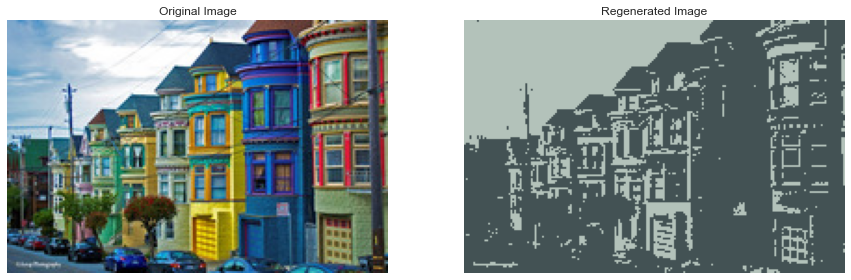

In [189]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 12),sharey=True)

ax1.axis("off")
ax1.imshow(original_img);
ax1.title.set_text('Original Image')

ax2.axis("off")
ax2.imshow(regenerated_image_k2);
ax2.title.set_text('Regenerated Image')

## k=5

In [190]:
centroids = kmean(df,5)

Epoch :  1
Epoch :  2
Epoch :  3
Epoch :  4
Epoch :  5
Epoch :  6
Epoch :  7
Epoch :  8
Epoch :  9
Epoch :  10
Epoch :  11
Epoch :  12
Epoch :  13
Epoch :  14
Epoch :  15
Epoch :  16
Epoch :  17
Epoch :  18
Epoch :  19
Epoch :  20
[[ 48  94 127]
 [211 222 224]
 [138 116  61]
 [ 41  48  53]
 [134 163 162]]


creating image from centroids color

In [191]:
regenerated_image_k5 = centroids[df.group]

In [192]:
regenerated_image_k5

array([[134, 163, 162],
       [134, 163, 162],
       [134, 163, 162],
       ...,
       [ 41,  48,  53],
       [ 41,  48,  53],
       [ 41,  48,  53]])

Displaying image

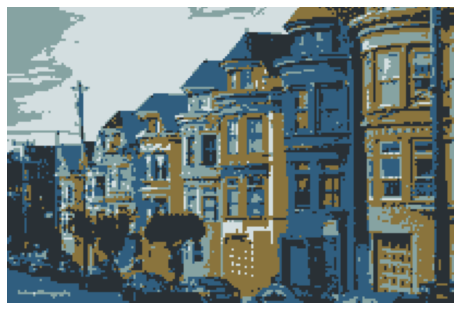

In [193]:
regenerated_image_k5 = regenerated_image_k5.reshape(original_img.shape)
plt.figure(figsize = (8,8))
plt.axis("off")
plt.imshow(regenerated_image_k5)
plt.show()

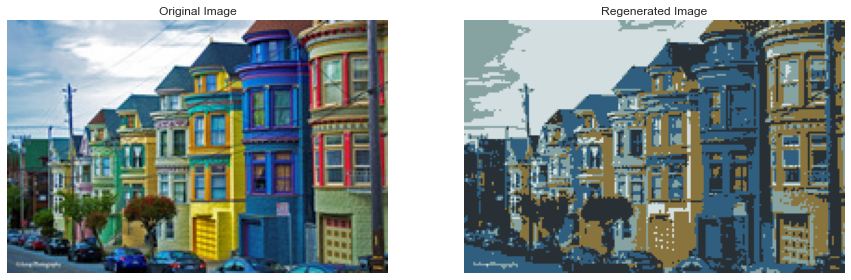

In [194]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 12),sharey=True)

ax1.axis("off")
ax1.imshow(original_img);
ax1.title.set_text('Original Image')

ax2.axis("off")
ax2.imshow(regenerated_image_k5);
ax2.title.set_text('Regenerated Image')

## k=10

In [195]:
centroids = kmean(df,10)

Epoch :  1
Epoch :  2
Epoch :  3
Epoch :  4
Epoch :  5
Epoch :  6
Epoch :  7
Epoch :  8
Epoch :  9
Epoch :  10
Epoch :  11
Epoch :  12
Epoch :  13
Epoch :  14
Epoch :  15
Epoch :  16
Epoch :  17
Epoch :  18
Epoch :  19
Epoch :  20
Epoch :  21
Epoch :  22
[[201 181  79]
 [ 41 106 152]
 [123 140 118]
 [152 183 198]
 [ 36  37  34]
 [ 33  65  94]
 [152 126  29]
 [181  37  57]
 [224 232 236]
 [ 88  89  74]]


creating image from centroids color

In [196]:
regenerated_image_k10 = centroids[df.group]

In [197]:
regenerated_image_k10

array([[152, 183, 198],
       [152, 183, 198],
       [152, 183, 198],
       ...,
       [ 36,  37,  34],
       [ 36,  37,  34],
       [ 36,  37,  34]])

Displaying image

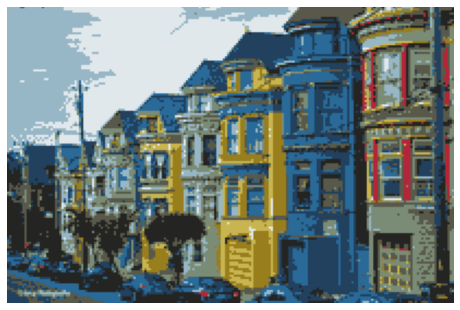

In [198]:
regenerated_image_k10 = regenerated_image_k10.reshape(original_img.shape)
plt.figure(figsize = (8,8))
plt.axis("off")
plt.imshow(regenerated_image_k10)
plt.show()

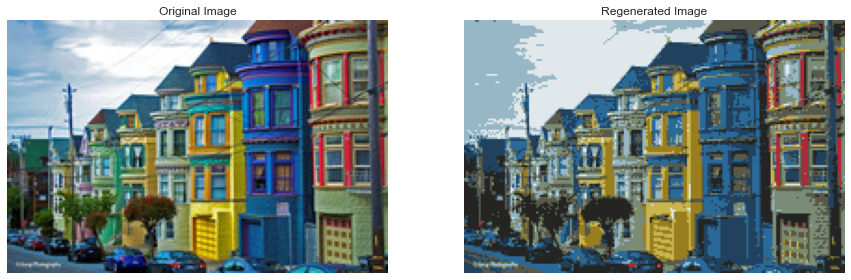

In [199]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 12),sharey=True)

ax1.axis("off")
ax1.imshow(original_img);
ax1.title.set_text('Original Image')

ax2.axis("off")
ax2.imshow(regenerated_image_k10);
ax2.title.set_text('Regenerated Image')

## Face Image

In [232]:
import cv2
face_original_img = cv2.imread("faceImage_1_25.jpg")
face_original_img = cv2.cvtColor(face_original_img, cv2.COLOR_BGR2RGB)

Size:  (158, 158, 3)


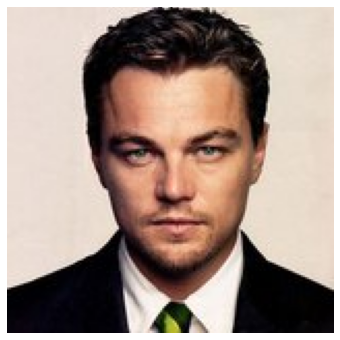

In [233]:
rows , col , channel = face_original_img.shape
print("Size: ",face_original_img.shape)
plt.figure(figsize = (6,6))
plt.axis("off")
plt.imshow(face_original_img)
plt.show()

In [234]:
img = face_original_img.reshape(-1,3)
img = img.astype('float')
print("shape:", img.shape)

df = pd.DataFrame(img, columns = ['R','G','B'])
df['group']=0

shape: (24964, 3)


In [223]:
centroids = kmean(df,2)
face_regenerated_image_k2 = centroids[df.group]

Epoch :  1
Epoch :  2
Epoch :  3
Epoch :  4
Epoch :  5
[[228 204 188]
 [ 44  28  26]]


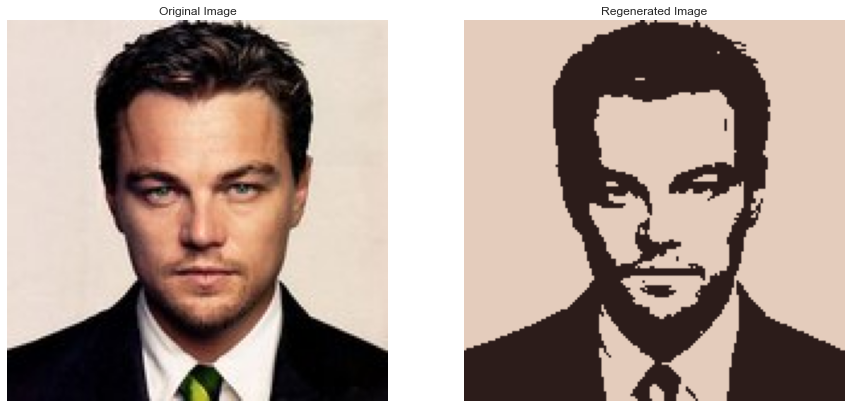

In [239]:
face_regenerated_image_k2 = face_regenerated_image_k2.reshape(face_original_img.shape)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 12),sharey=True)

ax1.axis("off")
ax1.imshow(face_original_img);
ax1.title.set_text('Original Image')

ax2.axis("off")
ax2.imshow(face_regenerated_image_k2);
ax2.title.set_text('Regenerated Image')

In [226]:
centroids = kmean(df,5)
face_regenerated_image_k5 = centroids[df.group]

Epoch :  1
Epoch :  2
Epoch :  3
Epoch :  4
Epoch :  5
Epoch :  6
Epoch :  7
Epoch :  8
Epoch :  9
Epoch :  10
Epoch :  11
[[163  43 227]
 [235 219 206]
 [ 15   9  10]
 [204 147 119]
 [114  76  64]]


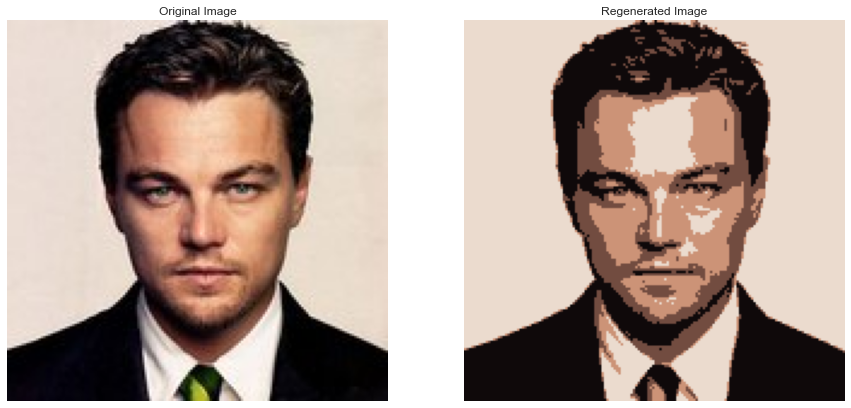

In [238]:
face_regenerated_image_k5 = face_regenerated_image_k5.reshape(face_original_img.shape)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 12),sharey=True)

ax1.axis("off")
ax1.imshow(face_original_img);
ax1.title.set_text('Original Image')

ax2.axis("off")
ax2.imshow(face_regenerated_image_k5);
ax2.title.set_text('Regenerated Image')

In [228]:
centroids = kmean(df,10)
face_regenerated_image_k10 = centroids[df.group]

Epoch :  1
Epoch :  2
Epoch :  3
Epoch :  4
Epoch :  5
Epoch :  6
Epoch :  7
Epoch :  8
Epoch :  9
Epoch :  10
Epoch :  11
Epoch :  12
Epoch :  13
Epoch :  14
Epoch :  15
Epoch :  16
Epoch :  17
Epoch :  18
Epoch :  19
Epoch :  20
Epoch :  21
Epoch :  22
Epoch :  23
Epoch :  24
[[179 122  97]
 [ 17 228 148]
 [121  81  68]
 [  8   5   7]
 [234 220 209]
 [ 61  39  34]
 [230 170 136]
 [178 164 157]
 [141  37 249]
 [  9 141 134]]


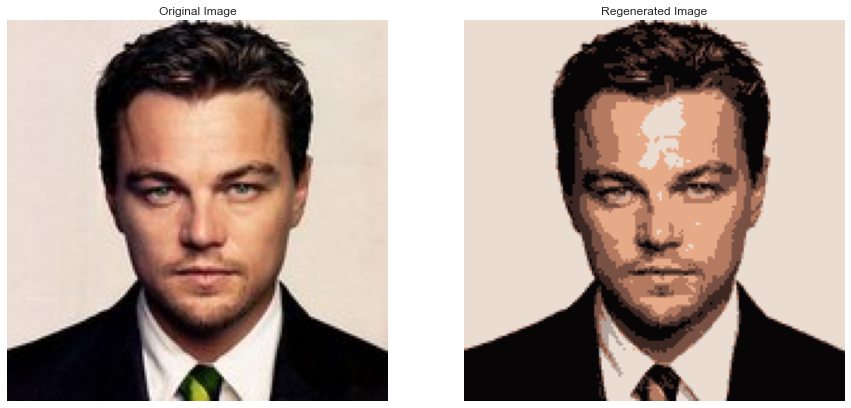

In [240]:
face_regenerated_image_k10 = face_regenerated_image_k10.reshape(face_original_img.shape)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 12),sharey=True)

ax1.axis("off")
ax1.imshow(face_original_img);
ax1.title.set_text('Original Image')

ax2.axis("off")
ax2.imshow(face_regenerated_image_k10);
ax2.title.set_text('Regenerated Image')

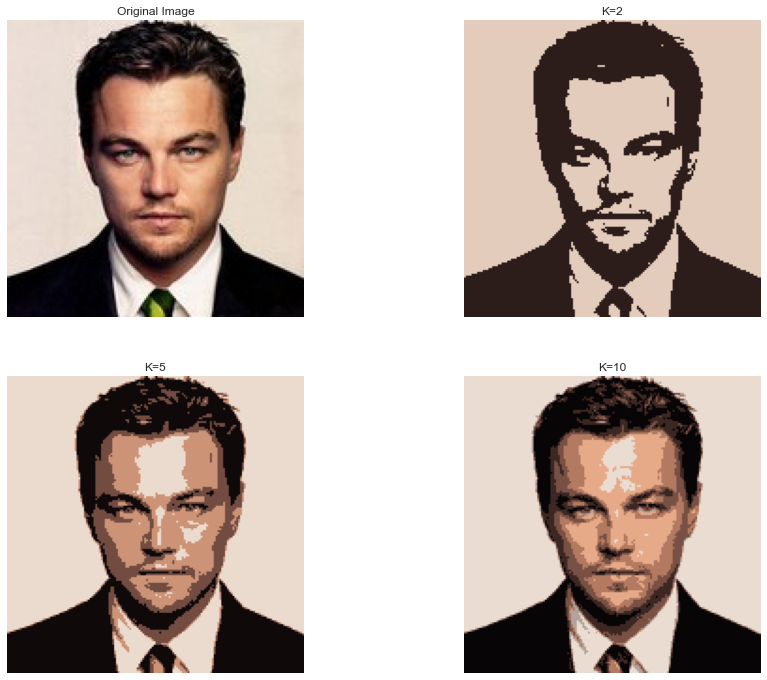

In [241]:
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(15, 12),sharey=True)

ax1.axis("off")
ax1.imshow(face_original_img);
ax1.title.set_text('Original Image')

ax2.axis("off")
ax2.imshow(face_regenerated_image_k2);
ax2.title.set_text('K=2')

ax3.axis("off")
ax3.imshow(face_regenerated_image_k5);
ax3.title.set_text('K=5')

ax4.axis("off")
ax4.imshow(face_regenerated_image_k10);
ax4.title.set_text('K=10')

# Comments

K-mean is an unsupervised machine learning algorithm that is used to make groups of objects which have similar properties. In our case, we are making groups of intensity values (color) of an image. K decides the number of groups it is going to make which in our case is the number of colors i.e if k=2 then it means it is going to make groups on the basis of 2 colors. So, as we increase the value of k it will use more colors to represent the image. Hence, as we are increasing the value of k our regenerated image looks more like the original image. As we can see, in the case of face image, as it doesn't have much colors in it so there isn't much difference between regenerated image at k=5 and k=10.

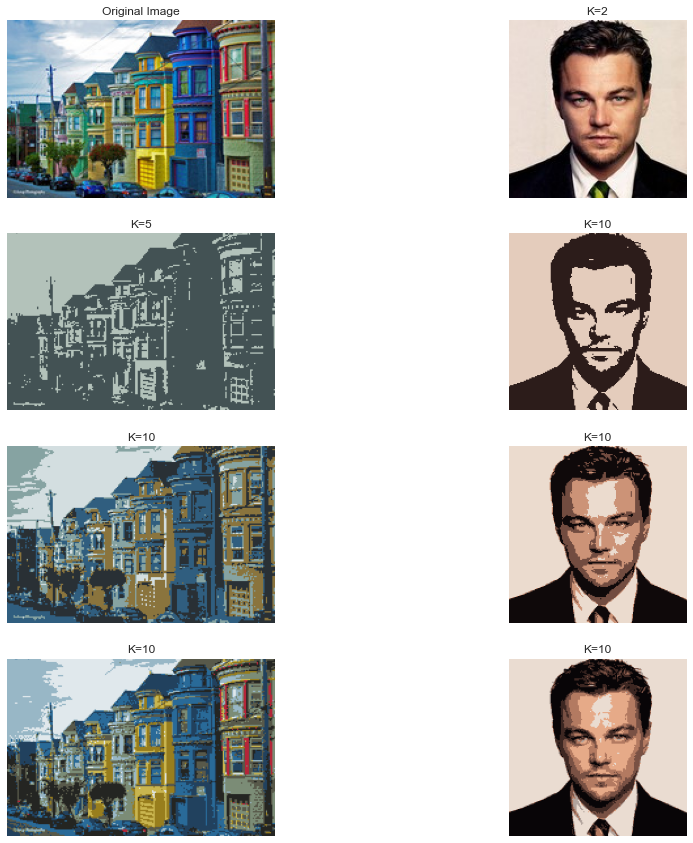

In [252]:
fig, ((ax1, ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(4, 2, figsize=(15, 15))

ax1.axis("off")
ax1.imshow(original_img);
ax1.title.set_text('Original Image')

ax2.axis("off")
ax2.imshow(face_original_img);
ax2.title.set_text('K=2')

ax3.axis("off")
ax3.imshow(regenerated_image_k2);
ax3.title.set_text('K=5')

ax4.axis("off")
ax4.imshow(face_regenerated_image_k2);
ax4.title.set_text('K=10')

ax5.axis("off")
ax5.imshow(regenerated_image_k5);
ax5.title.set_text('K=10')

ax6.axis("off")
ax6.imshow(face_regenerated_image_k5);
ax6.title.set_text('K=10')

ax7.axis("off")
ax7.imshow(regenerated_image_k10);
ax7.title.set_text('K=10')

ax8.axis("off")
ax8.imshow(face_regenerated_image_k10);
ax8.title.set_text('K=10')